### Import Packages



In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import plotly.express as px
from sklearn import svm

### Load Dataset



In [27]:
diabetes = pd.read_csv("./Data/diabetes_dataset__2019.csv")

In [3]:
diabetes.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8.0,6.0,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8.0,6.0,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6.0,6.0,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8.0,6.0,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8.0,8.0,no,occasionally,sometimes,normal,0.0,0,not much,no


In [4]:
diabetes.tail()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6.0,5.0,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6.0,5.0,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6.0,5.0,yes,occasionally,very often,high,0.0,0,not much,no
951,60 or older,Female,yes,yes,one hr or more,30.0,no,no,7.0,4.0,yes,occasionally,sometimes,high,2.0,0,quite often,yes
952,$$$$$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(diabetes.columns)
print("")
print(diabetes.shape)

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

(953, 18)


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               953 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    float64
 9   SoundSleep        952 non-null    float64
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [7]:
diabetes[diabetes['Age'].isnull()]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic


In [8]:
diabetes['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Name: Age, Length: 953, dtype: bool

### Exploratory Data Analysis



In [9]:
#the relationship between pregnancies and glucose levels
import plotly.express as px
fig = px.scatter(diabetes, x="Gender", y="Age",color="BMI",
            title=" Age, Gender and Body Mass Index of Diabetic Patitents")
fig.show()

In [51]:
#possible pie chart

In [36]:
#BMI, age, diabetic
df = diabetes
fig = px.bar(df, x="Diabetic_yes", y="BMI", barmode="group", color = "Age", title="BMI in Diabetics and Non-Diabetics relating to age group")
fig.show()

In [37]:
# Stress always and Quality Sleep
df = diabetes
fig = px.violin(df, x="Stress_always", y="SoundSleep", color= "Diabetic_yes", title="Quality sleep in relation to stress")
fig.show()

In [38]:
# Stress always and Quality Sleep
df = diabetes
fig = px.violin(df, x="Stress_not at all", y="SoundSleep", color= "Diabetic_yes", title="Quality sleep in relation to stress")
fig.show()

In [54]:
# BMI and Age
df= diabetes
fig = px.scatter(df, x="BMI", y="Age", color="highBP")

fig.update_layout(
    title="",)

fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Age', 'BMI', 'Sleep', 'SoundSleep', 'Pregancies', 'Gender_Female', 'Gender_Male', 'Family_Diabetes_no', 'Family_Diabetes_yes', 'highBP_no', 'highBP_yes', 'PhysicallyActive_less than half an hr', 'PhysicallyActive_more than half an hr', 'PhysicallyActive_none', 'PhysicallyActive_one hr or more', 'Smoking_no', 'Smoking_yes', 'Alcohol_no', 'Alcohol_yes', 'RegularMedicine_no', 'RegularMedicine_o', 'RegularMedicine_yes', 'JunkFood_always', 'JunkFood_occasionally', 'JunkFood_often', 'JunkFood_very often', 'Stress_always', 'Stress_not at all', 'Stress_sometimes', 'Stress_very often', 'BPLevel_High', 'BPLevel_Low', 'BPLevel_high', 'BPLevel_low', 'BPLevel_normal', 'BPLevel_normal ', 'Pdiabetes_0', 'Pdiabetes_yes', 'UriationFreq_not much', 'UriationFreq_quite often', 'Diabetic_ no', 'Diabetic_no', 'Diabetic_yes'] but received: highBP

In [53]:
# Gender and BMI
df= diabetes
fig = px.bar(df, x="BMI", y="Gender_Female", color="BMI")

fig.update_layout(
    title="Gender and Body Mass Index",)

fig.show()

In [41]:
# BMI and Gender
df= diabetes
fig = px.bar(df, x="BMI", y="Gender_Male", color="Gender_Male")

fig.update_layout(
    title="BMI of Males",)

fig.show()

In [46]:
# BMI and Age
df= diabetes
fig = px.scatter(df, x="Sleep", y="Age", color="Age")

fig.update_layout(
    title="Sleep concived through different Age categories",)

fig.show()

### Data Cleaning



In [32]:
X = diabetes["BMI"].to_numpy().reshape(-1, 1)
y = diabetes["Pdiabetes_yes"].to_numpy().reshape(-1, 1)

In [29]:
#cleaning the data -- dropping missing and duplicate values for sanity
diabetes.dropna(inplace = True)
diabetes.drop_duplicates(inplace = True)
diabetes = diabetes.reset_index(drop=True)

length = len(diabetes.index) #save length of array of later

In [30]:
#replacing categorical variables
col_category = ['Gender','Family_Diabetes','highBP','PhysicallyActive','Smoking','Alcohol','RegularMedicine','JunkFood','Stress','BPLevel','Pdiabetes','UriationFreq','Diabetic',]
for col in col_category:
    diabetes = pd.concat([diabetes.drop(col, axis=1), pd.get_dummies(diabetes[col], prefix=col, prefix_sep='_')], axis=1)

In [33]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
    print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")

idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
# Uses the remaining indices for testing
test_idx = idx[split_threshold:]

# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

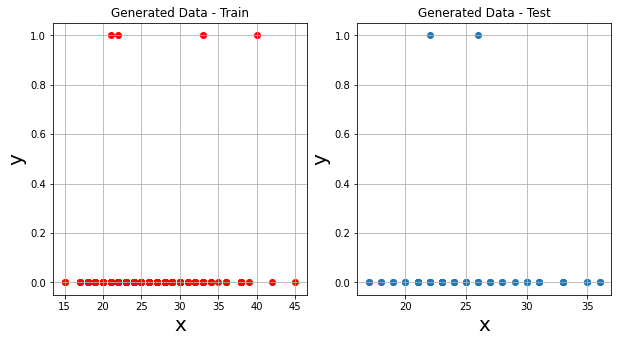

In [34]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='red')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')



# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

### Exploratory Data Analysis 2



In [23]:
df = diabetes
fig = px.bar(df, x="Diabetic_yes", y="BMI", barmode='group', color = "Diabetic_yes", height=400, title='BMI of diabetics compared to non-diabetics')
fig.show()

In [63]:
len(y_test)

57

In [62]:
len(x_test)

57

### Model fitting

In [65]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
clf.score(x_test, y_test.ravel())

/projects/013ca607-9af4-4b8b-9eb4-c9fa83e65e2d/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9649122807017544

In [0]:
W

In [0]:
Okay 

In [59]:
from sklearn.linear_model import LogisticRegression
#Create the model object
linr = LogisticRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)

/projects/013ca607-9af4-4b8b-9eb4-c9fa83e65e2d/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [60]:
linr.score(x_test, y_test)

0.9649122807017544

In [56]:
# Predicting using SKLearn
y_hat = linr.predict(x_test)

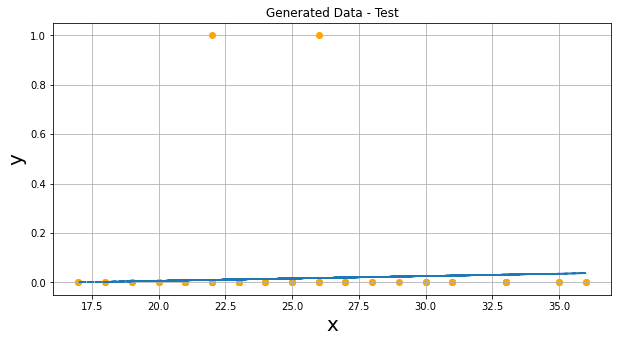

In [57]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()